## Sweet Cluster O'Mine: Uma abordagem de aprendizado de máquina não supervisionado para criação de listas de reprodução musicais em plataformas de streaming
### Aprendizado de Máquina 1 - 2020.1 - Trabalho 2
### Prof. Dr. Diego Furtado Silva
* João Gabriel Viana Hirasawa
* Juliana Ferreira Alves
* Matheus Malonda dos Santos Macaia
* Paulo Henrique Dal Bello
* Silvia Cristina de Jesus

# 1. Introdução

Streaming é o consumo em "tempo real" de música ou de outras mídias sem necessariamente baixar o arquivo (Wagner, 2015). Esta tecnologia permitiu aos usuários consumir músicas e filmes em seus dispositivos móveis com acesso a uma grande variedade de arquivos via assinatura online. O usuário pode montar suas próprias listas de reprodução ou escolher coletâneas já disponíveis pela plataforma (Hagen, 2015).

Hagen (2015) explica que, dada a portabilidade dos dispositivos em que funcionam os serviços de streaming, os contextos e, portanto, os sentimentos dos usuários associados a estes contextos, são bastante variados. Há recursos que são usados em conjunto com as listas de reprodução pessoais que usam os metadados dos arquivos para estender automaticamente a seleção de músicas do usuário, que tem como vantagem a possibilidade de explorar novas canções. As sugestões de novas músicas são baseadas em recursos contextuais que descrevem o que o sistema sabe sobre o usuário, seu contexto e o conteúdo de áudio de forma personalizada (Tian et al., 2019).

As pessoas ouvem e são afetadas pela música para atender às suas necessidades psicológicas (Greenber, 2017), o que desencadeia uma ampla gama de impulsos e emoções, que, por sua vez, induzem a uma classe particular de experiências mentais, os sentimentos (Habibi, 2014). Anderson et al. (2020) investigaram a associação entre traços de personalidade e comportamento de ouvir música usando aprendizado de máquina e mostraram que os cinco grandes traços de personalidade (Abertura, Consciência, Extroversão, Amabilidade e Estabilidade Emocional) podem ser previstos por preferências musicais e comportamentos auditivos habituais com moderada a alta precisão. Os autores concluíram que há uma grande quantidade de informações sobre a personalidade que são comunicadas por meio de preferências musicais e que a predição da personalidade humana pode ser predita com maior precisão a partir de dados de streaming de música do que os de redes sociais como Facebook e Twitter.

Variáveis biopsicossociais podem ser, portanto, combinadas com histórias de escuta musical e metadados com o objetivo de compreender como a música pode mudar o comportamento e afetar a saúde e o bem-estar (Greenbe, 2017). Cowen et al. (2020) descobriram 13 tipos distintos de experiências subjetivas associadas à música nas culturas ocidental e chinesa. O estudo baseou-se no julgamento de milhares de participantes nos Estados Unidos e na China que classificaram amostras de música com base em diferentes categorias de emoção e seus resultados pode ser visualizados em um mapa interativo.**¹**

O caminho inverso, ou seja, selecionar as músicas de acordo com o contexto ou sentimento, também é válido. Allik et al. (2019), por exemplo, desenvolveram uma aplicação online interativa, que permite aos usuários escolher músicas com base no humor. Na interface, os usuários podem explorar o espaço de humor e, em seguida, é exibida a tag de humor correspondente para essa área. Assim, os usuários não selecionam a música diretamente por artista ou faixa, mas pela emoção que corresponde à faixa mais próxima da preferência. É aplicada uma árvore de decisão para determinar a melhor maneira de fazer a transição de uma determinada música para outra, dependendo do seu grau de compatibilidade subsequentes e de seu conteúdo de andamento, harmônico e rítmico, que é inferido por meio de descritores analíticos de alto nível derivados dos recursos de áudio.

Os serviços de streaming têm recursos que permitem organizar listas de reprodução do mesmo gênero musical, do mesmo artista ou da mesma época. Entretanto, nem sempre essas playlists automáticas têm o mesmo andamento e ritmo. Uma mesma composição pode ter diferentes interpretações e os atributos que caracterizam o conjunto de dados podem variar para uma mesma canção que foi gravada por artistas ou circunstâncias distintas (por exemplo, gravação em estúdio e apresentação ao vivo). O Spotify é uma plataforma de streaming de músicas atualmente popular.

É possível extrair uma série de características para cada música usando o componente de recursos de áudio do serviço API do Spotify.**²** Estas métricas estão mais associadas ao ritmo e ao andamento das músicas do que considerar simplesmente o estilo, época de lançamento ou artista.

O objetivo deste trabalho é criar grupos de canções com base nas métricas do Spotify. Estes grupos de canções podem compor listas de reprodução que são selecionadas de acordo com o humor do usuário.

**¹** Disponível em: https://www.ocf.berkeley.edu/~acowen/music.html#modal. Acesso em 04 jan. 2021.

**²** Disponível em: https://developer.spotify.com/documentation/web-api/libraries/. Acesso em 04 jan. 2021.

# 2. Dados

Para este trabalho, são utilizados os dados "Spotify Dataset 1921-2020, 160k+ Tracks", disponibilizados na plataforma Kaggle **³**. Esse conjunto de dados contém diversas informações de músicas da plataforma. A seguir estão os significados de cada atributo presente no conjunto.

* **valence**: descreve a positividade musical transmitida por uma faixa
* **year**: o ano de lançamento da faixa
* **acousticness**: medida que indica se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica
* **artists**: a lista de artistas creditados pela produção da faixa
* **danceability**: descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral
* **duration_ms**:  a duração da faixa em milissegundos
* **energy**: medida de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas.
* **instrumentalness**: prevê se uma faixa não contém vocais
* **id**: o ID do Spotify para a faixa.
* **explicit**: se a faixa contém conteúdo explícito ou não
* **mode**: indica o modo  (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1, menor, 0
* **liveness**: detecta a presença de um público na gravação
* **loudness**: o volume geral de uma faixa em decibéis (dB). Os valores de intensidade são calculados em toda a trilha e são úteis para comparar a intensidade relativa das trilhas
* **speechiness**: detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada for a gravação mais próximo de 1,0 será o valor do atributo
* **tempo**: o tempo estimado geral de uma faixa em batidas por minuto (BPM) - velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média do tempo

A biblioteca pandas **⁴** na linguagem Python, foi utilizada para manipulação dos dados. Para visualização, as bibliotecas matplotlib **⁵** seaborn **⁶** e SciPy **⁷** Para pré-processamento, treinamento e avaliação dos modelos, a biblioteca scikit-learn **⁷**.

**³** Disponível em https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks. Acesso em 16 jan. 2021.

**⁴** Disponível em: https://pandas.pydata.org/. Acesso em 16 jan. 2021.

**⁵** Disponível em: https://matplotlib.org/. Acesso em 16 jan. 2021.

**⁶** Disponível em: https://seaborn.pydata.org/. Acesso em 16 jan. 2021.

**⁷** Disponível em: https://www.scipy.org/. Acesso em 16 jan. 2021.

**⁸** Disponível em: https://sklearn.org/. Acesso em 16 jan. 2021.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

Neste estudo, iremos utilizar apenas as músicas lançadas a partir de 2010.

In [2]:
data = pd.read_csv('dados/data.csv')

df = data[data['year'] >= 2010]

df.head()

valence  year  acousticness  ... release_date  speechiness    tempo
17606    0.434  2010       0.01510  ...   2010-10-05       0.0432  109.012
17607    0.795  2010       0.18500  ...   2010-12-01       0.0431   97.012
17608    0.361  2010       0.00544  ...   2010-10-01       0.0391  131.497
17609    0.504  2010       0.02750  ...   2010-11-26       0.0989   81.000
17610    0.065  2010       0.51200  ...   2010-10-05       0.0301  145.837

[5 rows x 19 columns]

## 2.1. Análise Exploratória

Aqui, objetiva-se conhecer melhor o conjunto de dados utilizado. O código abaixo retorna diversas informações interessantes, como o tipo de dados em cada atributo, o número de exemplos, nomes dos atributos, existência de dados nulos, etc.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21804 entries, 17606 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           21804 non-null  float64
 1   year              21804 non-null  int64  
 2   acousticness      21804 non-null  float64
 3   artists           21804 non-null  object 
 4   danceability      21804 non-null  float64
 5   duration_ms       21804 non-null  int64  
 6   energy            21804 non-null  float64
 7   explicit          21804 non-null  int64  
 8   id                21804 non-null  object 
 9   instrumentalness  21804 non-null  float64
 10  key               21804 non-null  int64  
 11  liveness          21804 non-null  float64
 12  loudness          21804 non-null  float64
 13  mode              21804 non-null  int64  
 14  name              21804 non-null  object 
 15  popularity        21804 non-null  int64  
 16  release_date      21804 non-null  o

Também é possível verificar a existência de músicas "repetidas", verificando se o nome da música, artistas, duração e ano de lançamento são iguais. Tais músicas podem conter alguma variação (ou seja, não são, de fato, iguais). Sabendo disso, para o contexto deste trabalho, foi tomada esta decisão consciente de removê-las mesmo assim.

In [4]:
print('Observações realmente duplicadas:', df.duplicated().sum())
print('Observações duplicadas segundo o critério:', df.duplicated(subset=['artists', 'name', 'duration_ms', 'year']).sum())

Observações realmente duplicadas: 0
Observações duplicadas segundo o critério: 718


### Distribuição de cada atributo

As medidas descritivas podem ajudar na compreensão da distribuição do conjunto de dados:

In [5]:
df.describe()

valence          year  ...   speechiness         tempo
count  21804.000000  21804.000000  ...  21804.000000  21804.000000
mean       0.460530   2015.004403  ...      0.102818    121.160507
std        0.240829      3.181665  ...      0.108379     30.327837
min        0.000000   2010.000000  ...      0.000000      0.000000
25%        0.272000   2012.000000  ...      0.037000     97.120500
50%        0.447000   2015.000000  ...      0.054500    121.011000
75%        0.641000   2018.000000  ...      0.119000    140.266000
max        0.993000   2020.000000  ...      0.950000    220.099000

[8 rows x 15 columns]

E podemos visualizar essas distribuições em gráficos:

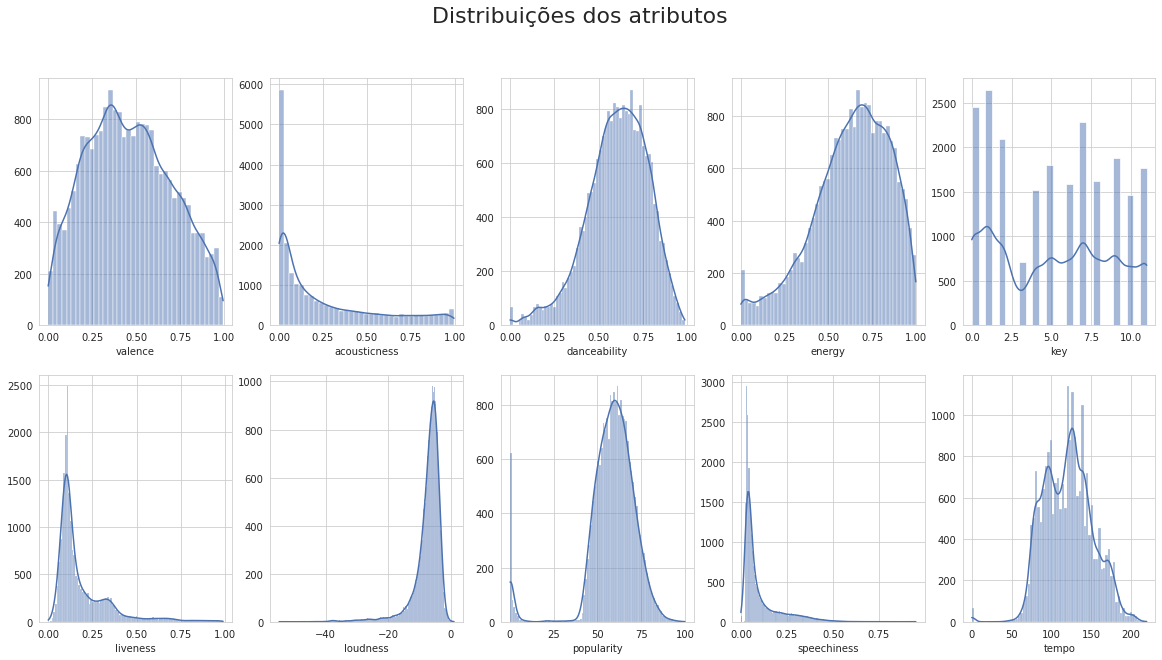

In [6]:
# Seleção de algumas colunas para visualizar
cols = ['valence', 'acousticness', 'danceability', 'energy', 'key', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo']

fig, axs = plt.subplots(2,5)

# Configurando o gráfico
fig.set_figheight(10)
fig.set_figwidth(20)
sns.set(font_scale=1)
plt.suptitle('Distribuições dos atributos', fontsize=22)

# Para cada atributo selecionado, plotar o histograma correspondente
for i, col in enumerate(cols):
    sns.histplot(df[col], ax=axs[i//5,i%5], kde=True, palette='YlGnBu_r')
    axs[i//5,i%5].set_ylabel('')

[Text(0, 0.5, 'Quantidade'),
 Text(0.5, 0, 'Explícita'),
 Text(0.5, 1.0, 'Distribuição das músicas explícitas')]

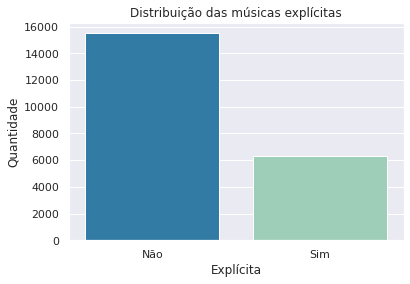

In [7]:
sns.set(font_scale=1)

c = sns.countplot(x=df['explicit'].map({0:'Não', 1:'Sim'}),  palette='YlGnBu_r')
c.set(xlabel='Explícita', ylabel='Quantidade', title='Distribuição das músicas explícitas')

### Visualizar correlações

O mapa de calor pode ser utilizado para visualização de algumas correlações entre variáveis.

[Text(0.5, 1.0, 'Mapa de calor das correlações dos atributos')]

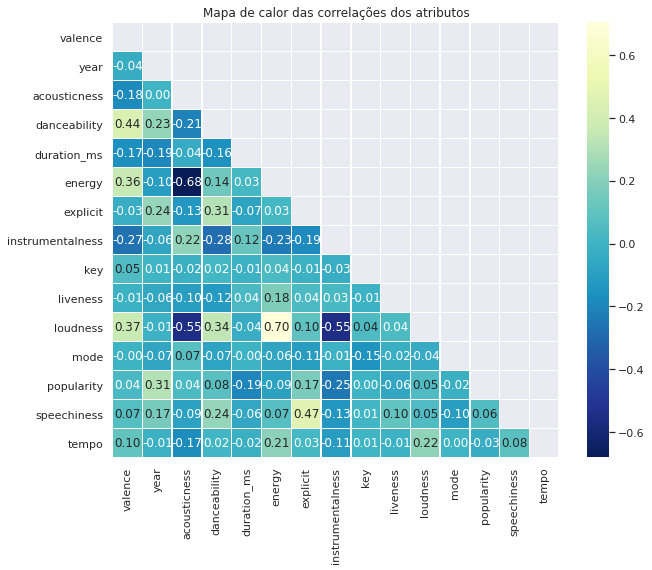

In [8]:
corr = df.corr()

# Máscara para não exibir o triângulo superior
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,8))
sns.set(font_scale=1)

h = sns.heatmap(corr, cmap='YlGnBu_r', annot=True, fmt='.2f', linewidths=.5, mask=mask)
h.set(title='Mapa de calor das correlações dos atributos')

Visualizando as variáveis de maior correlação em módulo, loudness e energia, é possível notar um pouco da relação esperada.

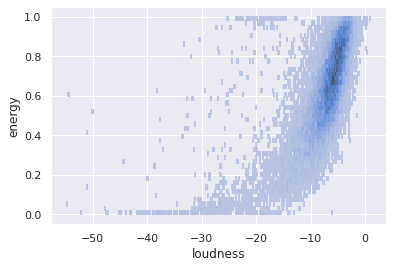

In [9]:
sns.histplot(x='loudness', y='energy', data=df, palette='YlGnBu_r')

Comumente, pode-se criar uma idealização de que tipos de músicas serão mais populares que outras. Isso também pode ser visualizado. No entanto, realmente não pareceu haver uma grande correlação da popularidade com outros atributos:

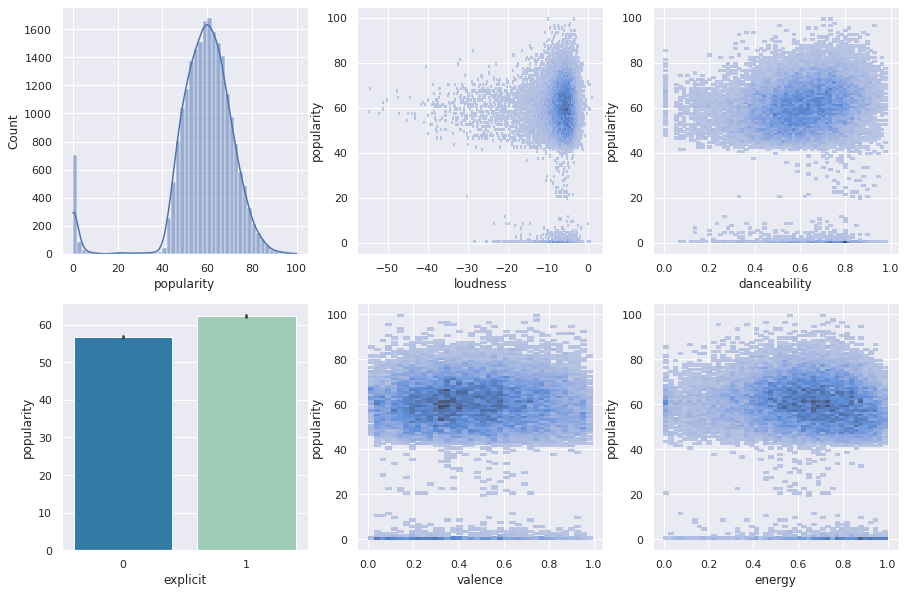

In [10]:
cols = ['loudness', 'danceability', 'valence', 'energy']

fig, axs = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(15)

sns.histplot(x='popularity', data=df, bins=50, kde=True, palette='YlGnBu_r', ax=axs[0,0])
sns.barplot(x='explicit', y='popularity', data=df, palette='YlGnBu_r', ax=axs[1,0])

for i, col in enumerate(cols):
  sns.histplot(x=col, y='popularity', data=df, ax=axs[i//2,i%2+1], palette='YlGnBu_r')

Já a "dançabilidade" está um pouco mais correlacionada com atributos como valência e energia. Uma análise possível é que músicas com mais energia vão sendo mais dançáveis, porém com muita energia acabam se tornando pouco dançáveis. Músicas de death metal, por exemplo, possuem alta energia.

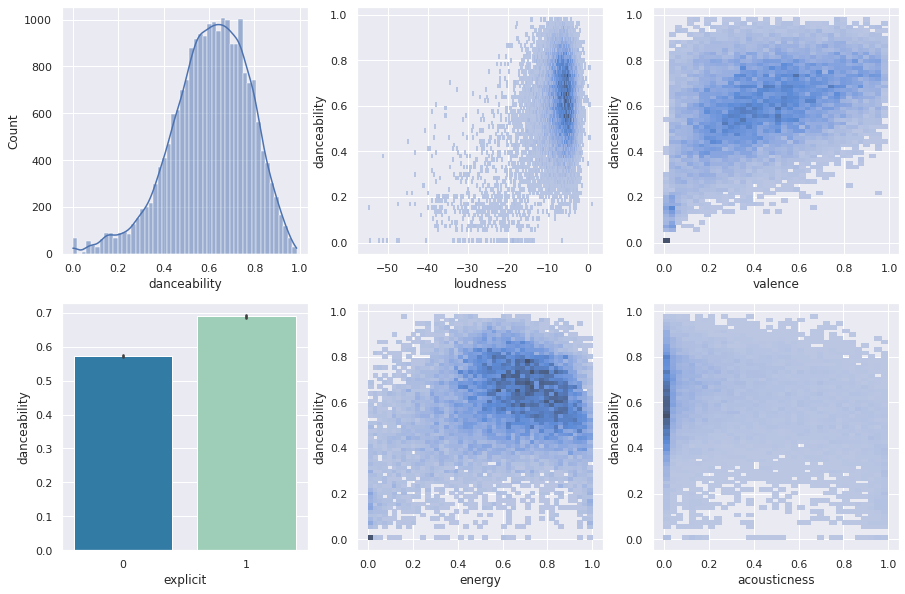

In [11]:
cols = ['loudness', 'valence', 'energy', 'acousticness']

fig, axs = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(15)

sns.histplot(x='danceability', data=df, bins=50, kde=True, palette='YlGnBu_r', ax=axs[0,0])
sns.barplot(x='explicit', y='danceability', data=df, palette='YlGnBu_r', ax=axs[1,0])

for i, col in enumerate(cols):
  sns.histplot(x=col, y='danceability', data=df, ax=axs[i//2,i%2+1], palette='YlGnBu_r')

Por fim, observemos a popularidade em função do ano de lançamento da música. Neste conjunto de dados, a popularidade se refere a algum período de 2020, nos Estados Unidos.

[Text(0, 0.5, 'Popularidade'), Text(0.5, 0, 'Ano de lançamento')]

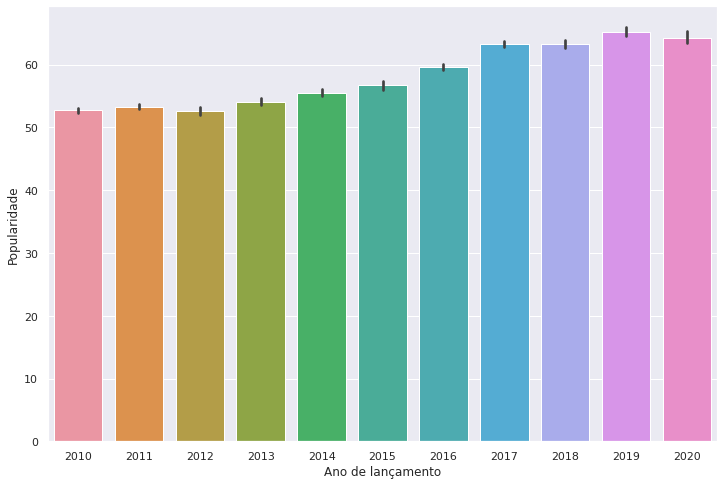

In [12]:
plt.figure(figsize=(12,8))
b = sns.barplot(x='year', y='popularity', data=df)
b.set(xlabel='Ano de lançamento', ylabel='Popularidade')

## 2.2. Limpeza dos dados

Observe-se que não há dados faltantes no conjunto de dados.

In [13]:
df.isna().any()

valence             False
year                False
acousticness        False
artists             False
danceability        False
duration_ms         False
energy              False
explicit            False
id                  False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
name                False
popularity          False
release_date        False
speechiness         False
tempo               False
dtype: bool

Como discutido anteriormente, músicas iguais em atributos específicos serão removidas.

In [14]:
print('Quantidade de músicas repetidas (segundo critério):', df.duplicated(subset=['artists', 'name', 'duration_ms', 'year']).sum())

Quantidade de músicas repetidas (segundo critério): 718


A decisão de qual duplicata remover é a de manter a duplicata com maior valor de popularity.

Também serão consideradas músicas que diferem apenas pela troca de "and" por "&". Para isto, é feita uma substituição por expressão regular em uma cópia do conjunto de dados, para que os exemplos fiquem iguais.

In [15]:
clean = df.copy()
clean['name'] = clean['name'].str.replace(r'\sand\s', ' & ', case=False)

duplicates = clean.duplicated(subset=['artists', 'name', 'duration_ms', 'year'], keep=False)

# Agrupar as duplicatas e encontrar os índices das músicas de maior popularidade
most_popular_duplicates = clean[duplicates].groupby(by=['artists', 'name'])['popularity'].idxmax().values

# Remover músicas que sejam duplicadas e que não estejam dentro dos índices encontrados
duplicates_to_drop = clean.loc[duplicates & (~clean.index.isin(most_popular_duplicates))].index

clean.drop(duplicates_to_drop, inplace=True)

In [16]:
print('Antes da limpeza:', df.shape)
print('Após limpeza:', clean.shape)

Antes da limpeza: (21804, 19)
Após limpeza: (21083, 19)


## 2.3. Pré-processamento

Este processo envolve preparar os dados para o uso nos modelos. Para tanto, foram selecionadas algumas colunas - tanto para tentar simplificar o modelo quanto para adequar melhor à tarefa definida no trabalho.

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
X = clean[['valence', 'danceability', 'energy', 'explicit', 'loudness', 'tempo']]

Visualizando novamente estas colunas:

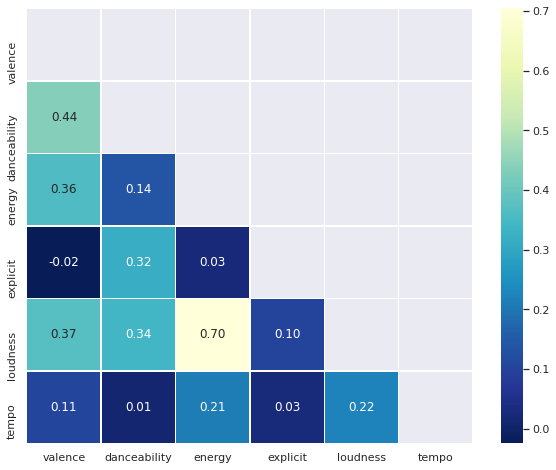

In [19]:
corr = X.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,8))

sns.heatmap(corr, cmap='YlGnBu_r', annot=True, fmt='.2f', linewidths=.5, mask=mask)

Os dados também foram padronizados, devido ao uso de distâncias pelos algoritmos dos modelos.

In [20]:
from sklearn.preprocessing import MinMaxScaler

X = clean[['valence', 'danceability', 'energy', 'explicit', 'loudness', 'tempo']]

scaler = MinMaxScaler()
X_transformed = scaler.fit_transform(X)

X_transformed.shape

(21083, 6)

# 3. Modelos de Aprendizado

## 3.1. Clustering Hierárquico

O primeiro algoritmo de clustering utilizado foi o Ward Linkage, que é um clustering hierárquico do tipo aglomerativo. Ou seja, este modelo começa com *n* clusters (sendo *n* o número de exemplos), todos singletons. Em seguida ele começa a aglomerar os grupo que tem a menor distância inter-cluster até que seu últino nível seja apenas um único cluster que contém todos os exemplos.

Para este algoritmo, é fornecido o número final de clusters desejado, n_clusters.

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors, NearestCentroid
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import scipy.cluster.hierarchy as sch

Para a obtenção do melhor número de clusters foi criado, a priori, o plot do dendrograma dos dados normalizados (*X_transformed*).

A função fancy_dendogram() visa mostrar a altura das distâncias inter-cluster, facilitando sua visualização e escolha da quantidade de grupos.**⁹**

**⁹** Retirado de https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/. Acesso em 14 jan. 2021.

In [22]:
# Fonte do código:
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = sch.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

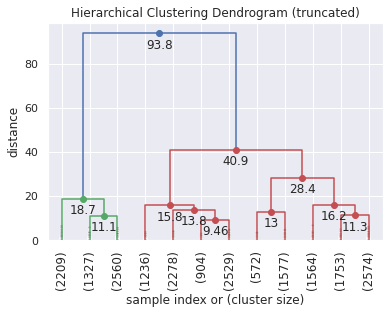

In [23]:
fancy_dendrogram(sch.linkage(X_transformed, method='ward'),
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,)
plt.show()

O dendrograma acima mostra que temos distâncias relativamentes parecidas para 3 e 4 clusters.

Em seguida, vamos utilizar as métricas Silhouette score, Calinski e Harabasz score e Davies-Bouldin score em uma busca dentro de um intervalo, a fim de encontrar o melhor número de clusters.

In [24]:
# Espaço no intervalo [2, 11)
n_clusters = range(2,11)

# Listas para guardar os valores das métricas
agg_silhouettes = []
agg_calinski = []
agg_davies = []

for i in n_clusters:
    print('Fit com', i, 'clusters')
    
    # Treinar o modelo com o valor de n_clusters
    agg_cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    agg_cluster.fit(X_transformed)
    
    # Guardar as métricas
    agg_silhouettes.append(silhouette_score(X_transformed, agg_cluster.labels_))
    agg_calinski.append(calinski_harabasz_score(X_transformed, agg_cluster.labels_))
    agg_davies.append(davies_bouldin_score(X_transformed, agg_cluster.labels_))

Fit com 2 clusters
Fit com 3 clusters
Fit com 4 clusters
Fit com 5 clusters
Fit com 6 clusters
Fit com 7 clusters
Fit com 8 clusters
Fit com 9 clusters
Fit com 10 clusters


E possível visualizar as métricas em função do número de clusters:

Text(0, 0.5, 'Número de clusters')

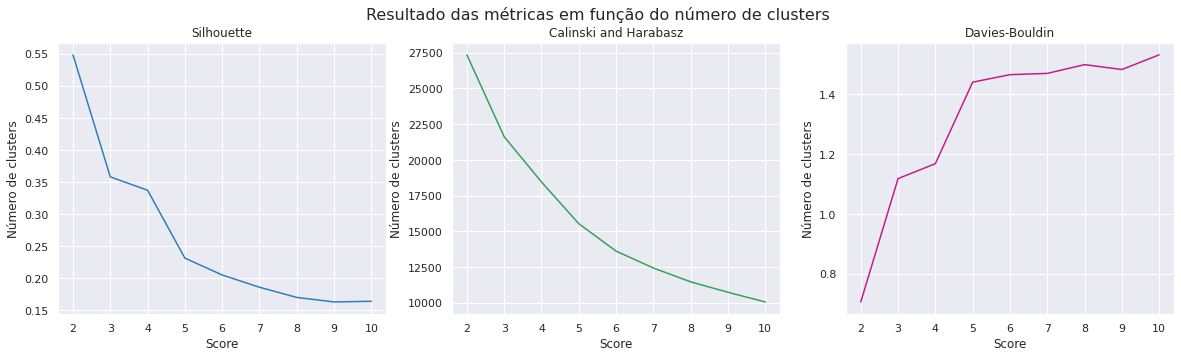

In [25]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.suptitle('Resultado das métricas em função do número de clusters', fontsize=16)

ax[0].plot(range(2,11), agg_silhouettes, c='#2c7fb8')
ax[0].set_title('Silhouette')
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Número de clusters')

ax[1].plot(range(2,11), agg_calinski, c='#31a354')
ax[1].set_title('Calinski and Harabasz')
ax[1].set_xlabel('Score')
ax[1].set_ylabel('Número de clusters')

ax[2].plot(range(2,11), agg_davies, c='#c51b8a')
ax[2].set_title('Davies-Bouldin')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Número de clusters')

No gráfico da silhueta, o score cai pouco para os números de cluster de 3 a 5. Já o de Calinski parece não trazer muitas informações relevantes, tendo em vista que, quanto maior esta métrica, melhor é o agrupamento. Por fim, o de Davies (que quanto mais próximo de 0, melhor é o modelo) mostra um mínimo local quando o número de clusters é 5.

Com estes resultados, decidimos treinar o modelo para 5 clusters.

In [26]:
agg_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg_cluster.fit(X_transformed)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

E podemos verificar os clusters gerados:

In [27]:
np.unique(agg_cluster.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([5891, 2149, 6947, 3887, 2209]))

Podemos ver que os 5 clusters obtidos contêm quantidadas próximas de valores.

## 3.2. DBSCAN

O DBSCAN é um tipo de clustering baseado em densidade. Sua funcionalidade aplica o conceito de distâncias entre exemplos e agrupa regiões mais densas. Há dois hiperparâmetros de interesse: eps e min_samples.

* eps: a distância máxima para para pontos serem considerados dentro de uma vizinhança
* min_samples: o mínimo de pontos na vizinhança para considerar o ponto um ponto de núcleo

Para simplificar, o min_samples será mantido em 10. Iremos analisar o efeito do eps no agrupamento e tentar otimizar este valor.

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [29]:
# Evitar o aviso de eficiência no DBSCAN
import warnings
from sklearn.exceptions import EfficiencyWarning
warnings.filterwarnings(action='ignore', category=EfficiencyWarning)

A visualização das distâncias entre os exemplos pode auxiliar na escolha do eps. O joelho da curva indica essa escolha. Nesse caso, escolhemos que o mínimo de pontos para que um ponto seja núcleo será de 10. Portanto, encontremos as distâncias utilizando o Nearest Neighbors com 10-vizinhos.

In [30]:
knn = NearestNeighbors(n_neighbors=10, n_jobs=-1)
knn.fit(X_transformed)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                 radius=1.0)

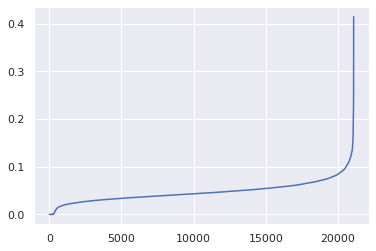

In [31]:
distances, indices = knn.kneighbors(X_transformed)
distances_sorted = np.sort(distances, axis=0)[:,1]
plt.plot(distances_sorted)

Aparentemente, o valor de eps ideal estaria próximo de 0.1. Uma outra abordagem tomada será realizar uma busca em um espaço de valores e analisar algumas métricas para cada valor:

In [33]:
# Espaço no intervalo (0, 0.45)
eps_space = np.arange(0, 0.5, 0.05)[1:]

# Listas para guardar os valores das métricas
db_silhouettes = []
db_calinski = []
db_davies = []

for i in eps_space:
    print('Fit com eps:', i)

    # Pré-computar as distâncias para otimizar memória
    neighbors_graph = knn.radius_neighbors_graph(X_transformed, radius=i, mode='distance', sort_results=False)
    
    # Aplicar o modelo sobre as distâncias pré-computadas e o valor de eps da iteração
    db_cluster = DBSCAN(eps=i, min_samples=10, metric='precomputed', n_jobs=-1)
    db_cluster.fit(neighbors_graph)

    # Se o algoritmo gerou mais de um único cluster, as métricas podem ser computadas
    if len(np.unique(agg_cluster.labels_)) > 1:
        db_silhouettes.append(silhouette_score(X_transformed, db_cluster.labels_))
        db_calinski.append(calinski_harabasz_score(X_transformed, db_cluster.labels_))
        db_davies.append(davies_bouldin_score(X_transformed, db_cluster.labels_))

Fit com eps: 0.05
Fit com eps: 0.1
Fit com eps: 0.15000000000000002
Fit com eps: 0.2
Fit com eps: 0.25
Fit com eps: 0.30000000000000004
Fit com eps: 0.35000000000000003
Fit com eps: 0.4
Fit com eps: 0.45


Assim, é possível visualizar as métricas em função do eps:

Text(0, 0.5, 'eps')

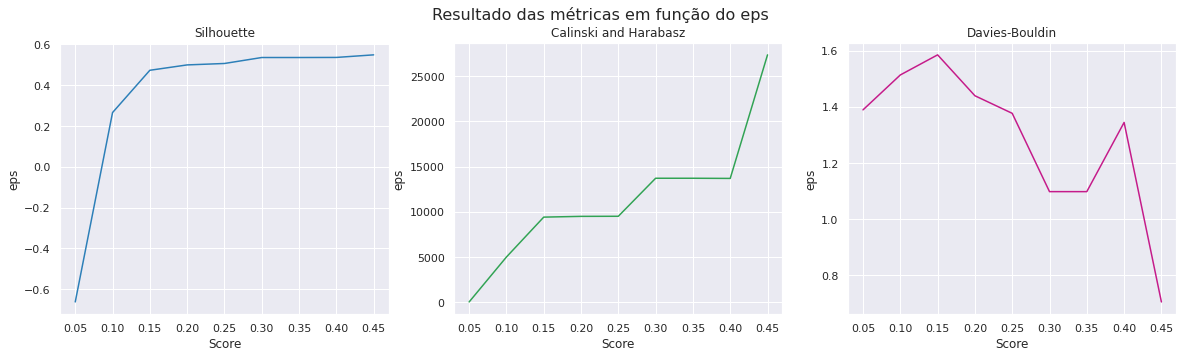

In [34]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.suptitle('Resultado das métricas em função do eps', fontsize=16)

ax[0].plot(eps_space, db_silhouettes, c='#2c7fb8')
ax[0].set_title('Silhouette')
ax[0].set_xlabel('Score')
ax[0].set_ylabel('eps')

ax[1].plot(eps_space, db_calinski, c='#31a354')
ax[1].set_title('Calinski and Harabasz')
ax[1].set_xlabel('Score')
ax[1].set_ylabel('eps')

ax[2].plot(eps_space, db_davies, c='#c51b8a')
ax[2].set_title('Davies-Bouldin')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('eps')

Desta forma, um valor a partir de 0.15 seria, aparentemente, bom, sem haver um aumento muito grande após isso na primeira métrica. Com base nas outras duas, decidimos utilizar 0.3.

In [35]:
neighbors_graph = knn.radius_neighbors_graph(X_transformed, radius=0.3, mode='distance', sort_results=False)
db_cluster = DBSCAN(eps=0.3, min_samples=10, metric='precomputed', n_jobs=-1)
db_cluster.fit(neighbors_graph)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='precomputed',
       metric_params=None, min_samples=10, n_jobs=-1, p=None)

Assim, podemos verificar os clusters gerados:

In [36]:
np.unique(db_cluster.labels_, return_counts=True)

(array([-1,  0,  1]), array([    6, 14983,  6094]))

# 4. Análise dos Resultados

## 4.1. Clustering hierárquico

In [37]:
print('Agglomerative Clustering')
print('Silhouette score:', silhouette_score(X_transformed, agg_cluster.labels_))
print('Calinski Harabsz score:', calinski_harabasz_score(X_transformed, agg_cluster.labels_))
print('Davies Bouldin score:', davies_bouldin_score(X_transformed, agg_cluster.labels_))

Agglomerative Clustering
Silhouette score: 0.23140914927039266
Calinski Harabsz score: 15523.94086642288
Davies Bouldin score: 1.4404753637300556


O algoritmo gerou 5 clusters de tamanhos parecidos.

In [38]:
df_clusters_agg = clean.copy()
df_clusters_agg.insert(0, 'cluster', agg_cluster.labels_)
df_clusters_agg['cluster'].value_counts()

2    6947
0    5891
3    3887
4    2209
1    2149
Name: cluster, dtype: int64

Fazendo a visualização dos clusters, existe uma distinção aparente feita. O cluster 0, nesta visualização, está sobrepondo os outros, mas os outros são certas regiões dentro dos dados.

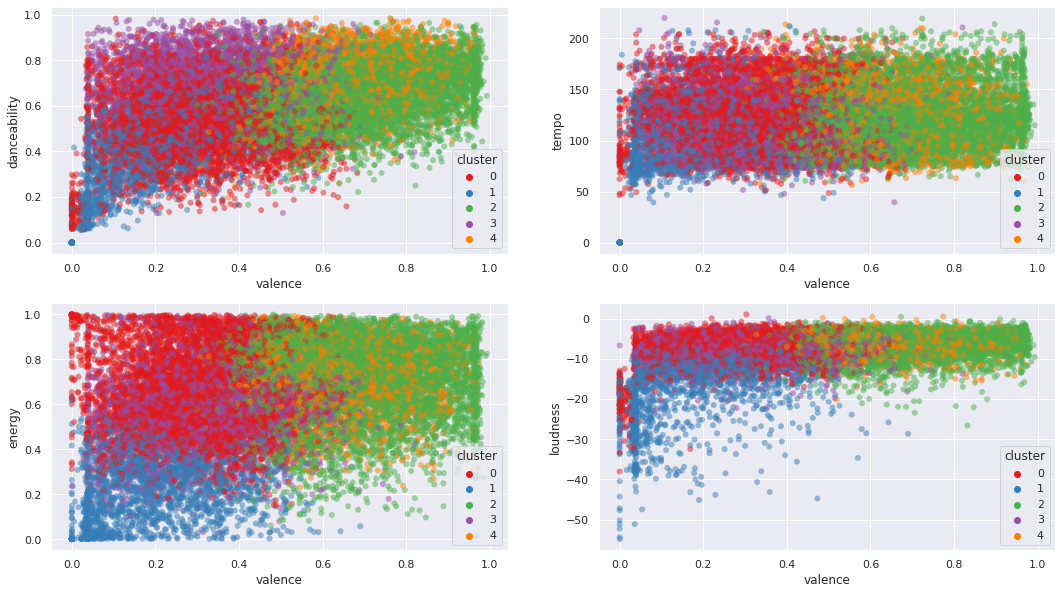

In [39]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(18)

cols = ['danceability', 'energy', 'tempo', 'loudness']

for i in range(2):
    for j in range(2):
        sns.scatterplot(x='valence', y=cols[j*2+i], data=df_clusters_agg, ax=axs[i,j], hue='cluster', linewidth=0, alpha=0.5, palette='Set1')

Sem o cluster 0, é possível visualizar a distinção dos outros clusters. O cluster 4, por exemplo, tende a possuir menor valência, menor "dançabilidade", menor energia e, num geral, menor volume.

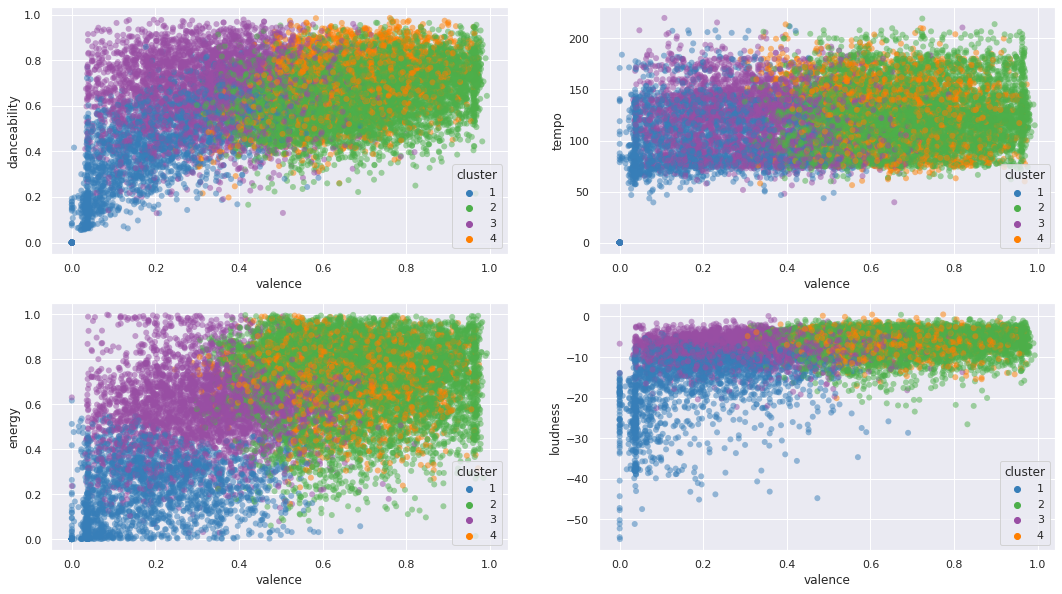

In [40]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(18)

cols = ['danceability', 'energy', 'tempo', 'loudness']

colors = ['#377eb8','#4daf4a','#984ea3','#ff7f00']

for i in range(2):
    for j in range(2):
        sns.scatterplot(x='valence', y=cols[j*2+i], data=df_clusters_agg[df_clusters_agg['cluster'] != 0], ax=axs[i,j], hue='cluster', linewidth=0, alpha=0.5, palette=colors)

Também podemos visualizar os clusters com as variáveis mais correlatas.

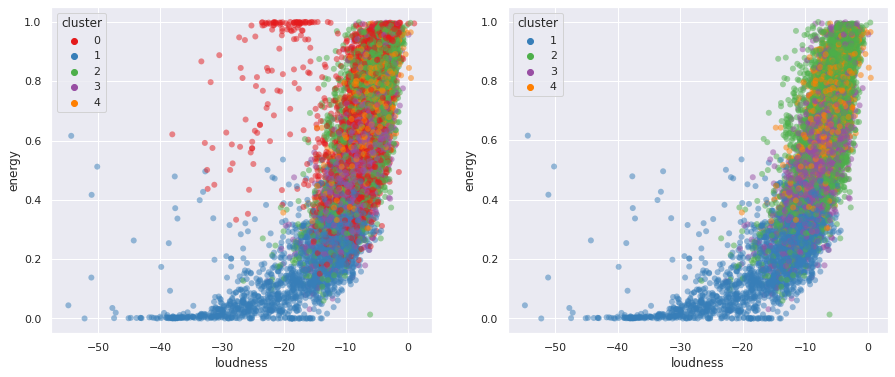

In [41]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(15)

colors = ['#377eb8','#4daf4a','#984ea3','#ff7f00']

sns.scatterplot(x='loudness', y='energy', data=df_clusters_agg, hue='cluster', ax=ax[0], linewidth=0, alpha=0.5, palette='Set1')
sns.scatterplot(x='loudness', y='energy', data=df_clusters_agg[df_clusters_agg['cluster'] != 0], ax=ax[1], hue='cluster', linewidth=0, alpha=0.5, palette=colors)

### Matriz cofenética

In [42]:
from scipy.spatial.distance import pdist, squareform
distances = pdist(X_transformed, metric='euclidean')
dist_matrix = squareform(distances)
dist_matrix

array([[0.        , 0.37232097, 1.04556204, ..., 0.22688469, 1.06409675,
        1.05462165],
       [0.37232097, 0.        , 1.14421504, ..., 0.17268978, 1.20274439,
        1.04190867],
       [1.04556204, 1.14421504, 0.        , ..., 1.09588407, 0.32068836,
        0.36552317],
       ...,
       [0.22688469, 0.17268978, 1.09588407, ..., 0.        , 1.12617909,
        1.03540018],
       [1.06409675, 1.20274439, 0.32068836, ..., 1.12617909, 0.        ,
        0.50719467],
       [1.05462165, 1.04190867, 0.36552317, ..., 1.03540018, 0.50719467,
        0.        ]])

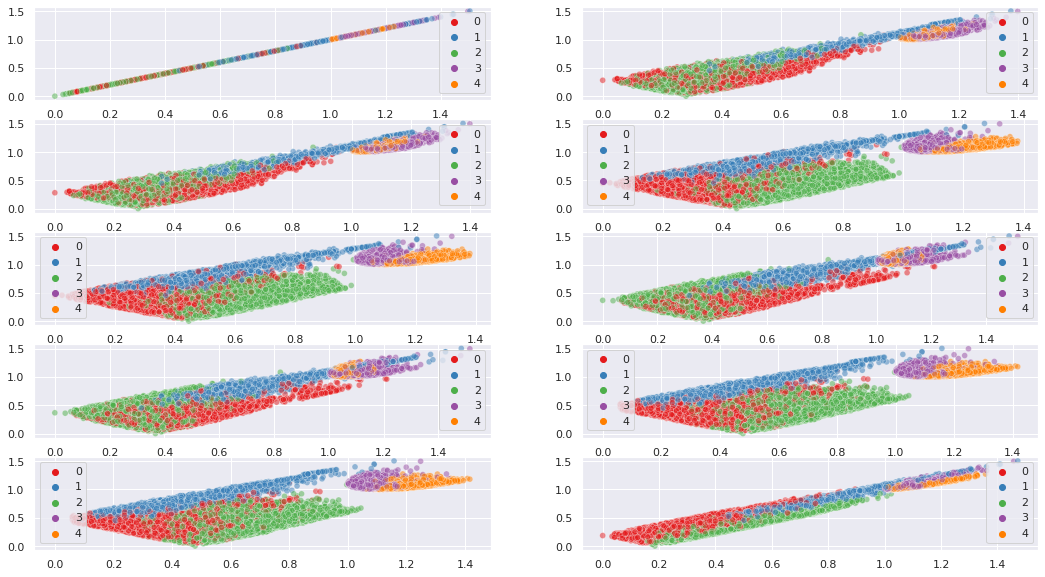

In [43]:
fig, axs = plt.subplots(5,2)
fig.set_figheight(10)
fig.set_figwidth(18)

for i in range(5):
    for j in range(2):
        sns.scatterplot(y=dist_matrix[:,0], x=dist_matrix[j*1000+i*1000], ax=axs[i,j], hue = agg_cluster.labels_,alpha=0.5, palette='Set1')

## 4.2. DBSCAN

In [44]:
print('DBSCAN')
print('Silhouette score:', silhouette_score(X_transformed, db_cluster.labels_))
print('Calinski Harabsz score:', calinski_harabasz_score(X_transformed, db_cluster.labels_))
print('Davies Bouldin score:', davies_bouldin_score(X_transformed, db_cluster.labels_))

DBSCAN
Silhouette score: 0.5350023769310587
Calinski Harabsz score: 13701.847228595427
Davies Bouldin score: 1.0979581395388933


Como visto anteriormente, o DBSCAN gerou dois clusters desiguais:

In [45]:
df_clusters_db = clean.copy()
df_clusters_db.insert(0, 'cluster', db_cluster.labels_)
df_clusters_db['cluster'].value_counts()

 0    14983
 1     6094
-1        6
Name: cluster, dtype: int64

Fazendo a mesma visualização de antes, não parece haver tanta separação entre os clusters gerados, estes estão sobrepostos.

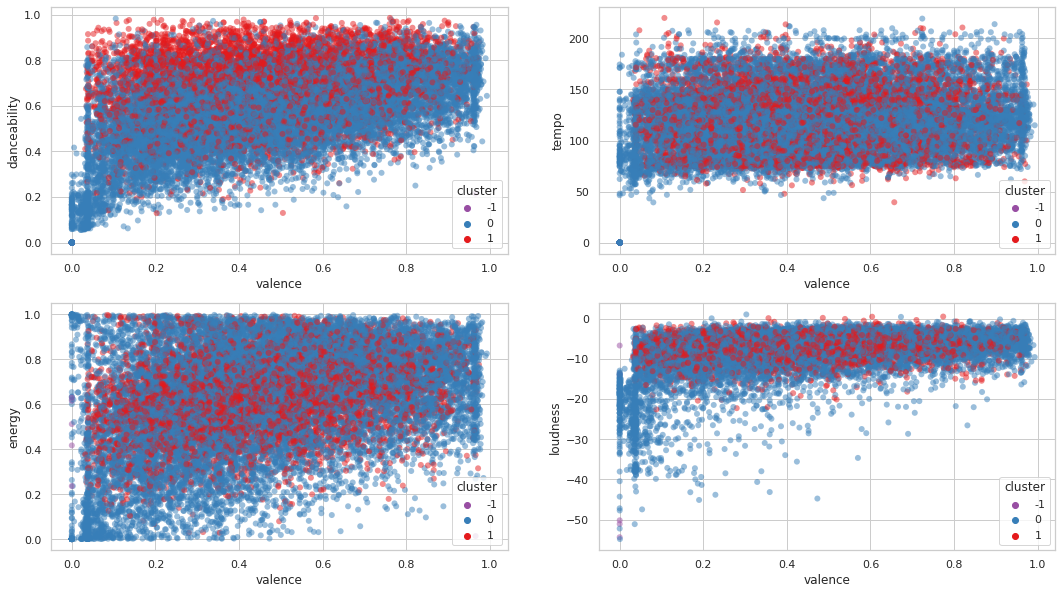

In [46]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(18)

cols = ['danceability', 'energy', 'tempo', 'loudness']

colors = ['#984ea3', '#377eb8', '#e41a1c']

for i in range(2):
    for j in range(2):
        sns.scatterplot(x='valence', y=cols[j*2+i], data=df_clusters_db, ax=axs[i,j], hue='cluster', linewidth=0, alpha=0.5, palette=colors)

E visualizando novamente com as variáveis mais correlatas.

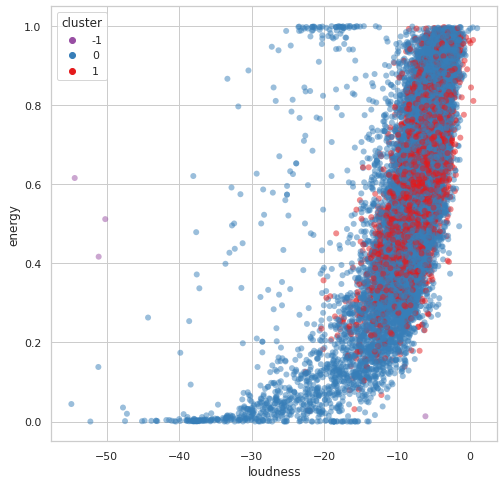

In [47]:
plt.figure(figsize=(8,8))

colors = ['#984ea3', '#377eb8', '#e41a1c']

sns.scatterplot(x='loudness', y='energy', data=df_clusters_db, hue='cluster',  linewidth=0, alpha=0.5, palette=colors)

# 5. Conclusão

Apesar de o DBSCAN apresentar, no geral, melhores resultados nas métricas avaliativas escolhidas (exceto no Calinski and Harabz Index), a partir da análise visual, conclui-se que a clusterização aglomerativa através do algoritmo Ward mostrou resultados mais alinhados com o que era buscado no objetivo proposto. Ainda, como visto nos resultados da clusterização aglomerativa, parece existir uma possibilidade de se agrupar músicas com base em suas características.

# Referências Bibliográficas

Allik, A; Thalmann, F; Metzig, C; Sandler, M. **Join my party! How can we enhance social interactions in music streaming?** Disponível em <https://qmro.qmul.ac.uk/xmlui/handle/123456789/62418>. Acesso em 04 jan 2021.

Anderson, I.; Gil, S.; Gibson, C.; Wolf, S.; Shapiro, W.; Semerci, O.; Greenberg, D. M. "Just the Way Yo" Are": Linking Music Listening on Spotify and Personality. **Social Psychological and Personality Science**, 2020, doi: 10.1177/1948550620923228.

Cowen, A.S..; Fang, X.; Sauter, D.; Keltner, D. What music makes us feel: At least 13 dimensions organize subjective experiences associated with music across different cultures. **Proceedings of the National Academy of Sciences**, v. 117, n. 4, p. 1924-1934, 2020 doi: 10.1073/pnas.1910704117.

Greenberg, D.M.; Rentfrow, P.J. Music and big data: a new frontier. **Current Opinion in Behavioral Sciences**, v. 18, p. 50-56, 2017, doi: doi.org/10.1016/j.cobeha.2017.07.007.

Habibi, A.; Damasio, A. Music, feelings, and the human brain. **Psychomusicology: Music, Mind, and Brain**, v. 24, p. 92-102, 2014, doi: 10.1037/pmu0000033.

Hagen, A.N. The Playlist Experience: Personal Playlists in Music Streaming Services. **Popular Music and Society**, v. 38, n. 5, p. 625-645, 2015, doi: 10.1080/03007766.2015.1021174.

Maklin, Cory. Hierarchical Agglomerative Clustering Algorithm Example In Python. 2018. Disponível em: https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019. Acesso em: 14 jan. 2021.

Tian, M.; Mehrotra, R.; Maystre, L. Lalmas, M. **Homepage and Search Personalization at Spotify**. Disponível em <https://qmro.qmul.ac.uk/xmlui/bitstream/handle/123456789/61898/DMRN14_Proceedings_17Dec2019.pdf?sequence=2#page=14>. Acesso em 04 jan 2021.

Wagner, T.; Rose, M.; Baccarella, C. ; Voigt, K. Streaming killed the download star! How the business model of streaming services revolutionizes music distribution. **Journal of Organizational Advancement, Strategic and Institutional Studies**, v. 8, p. 29-39, 2015.

Wei, Haitian. **How to measure clustering performances when there are no ground truth?** 2020. Disponível em: https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c. Acesso em: 14 jan. 2021.